# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren gleichzeitig

In [11]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification import verification

In [12]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [13]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [14]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


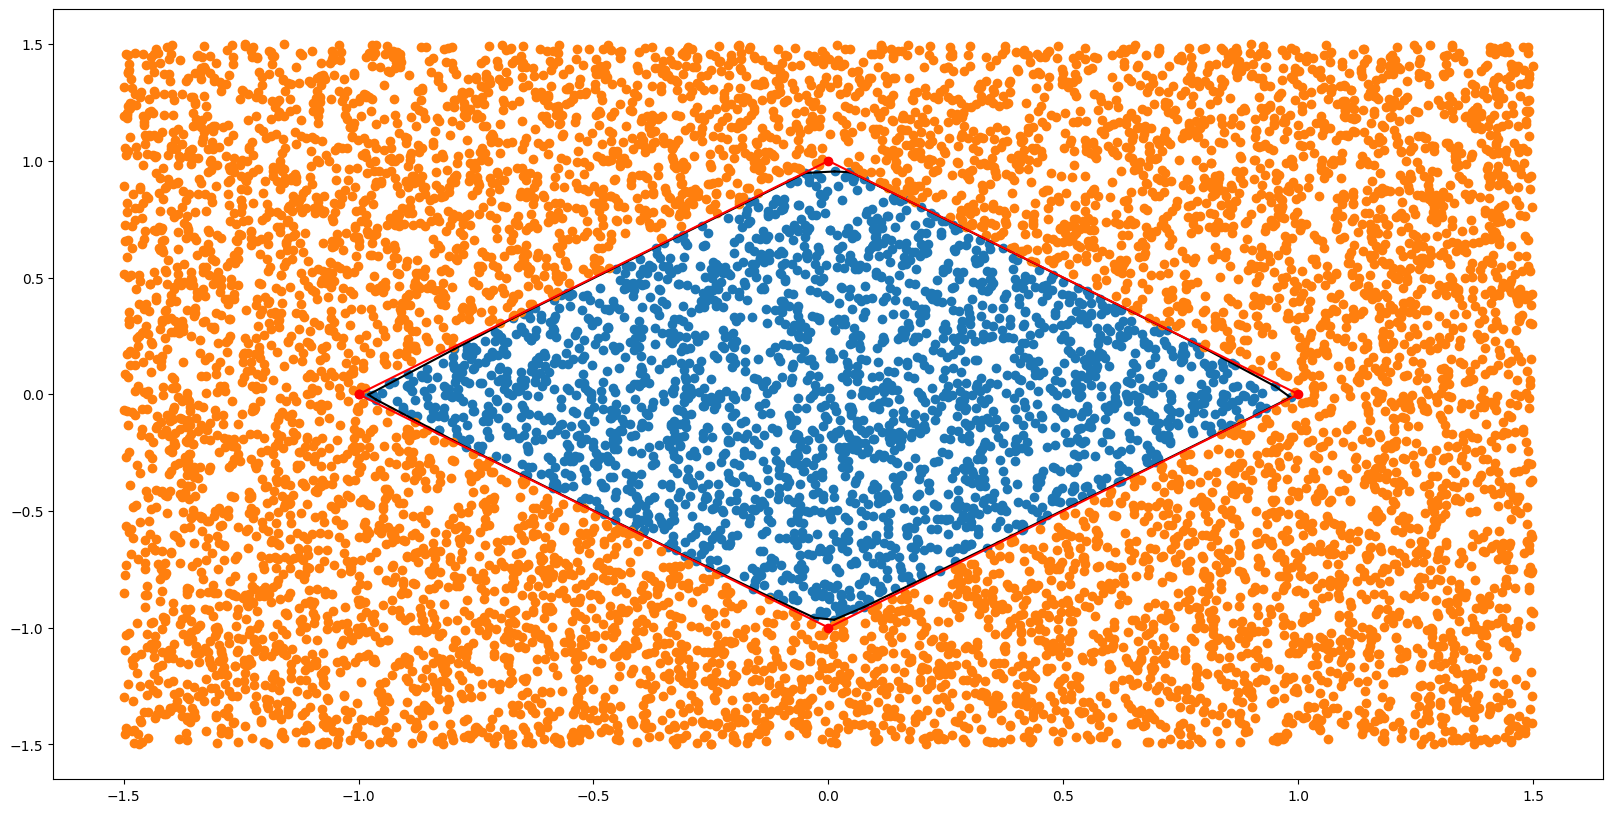

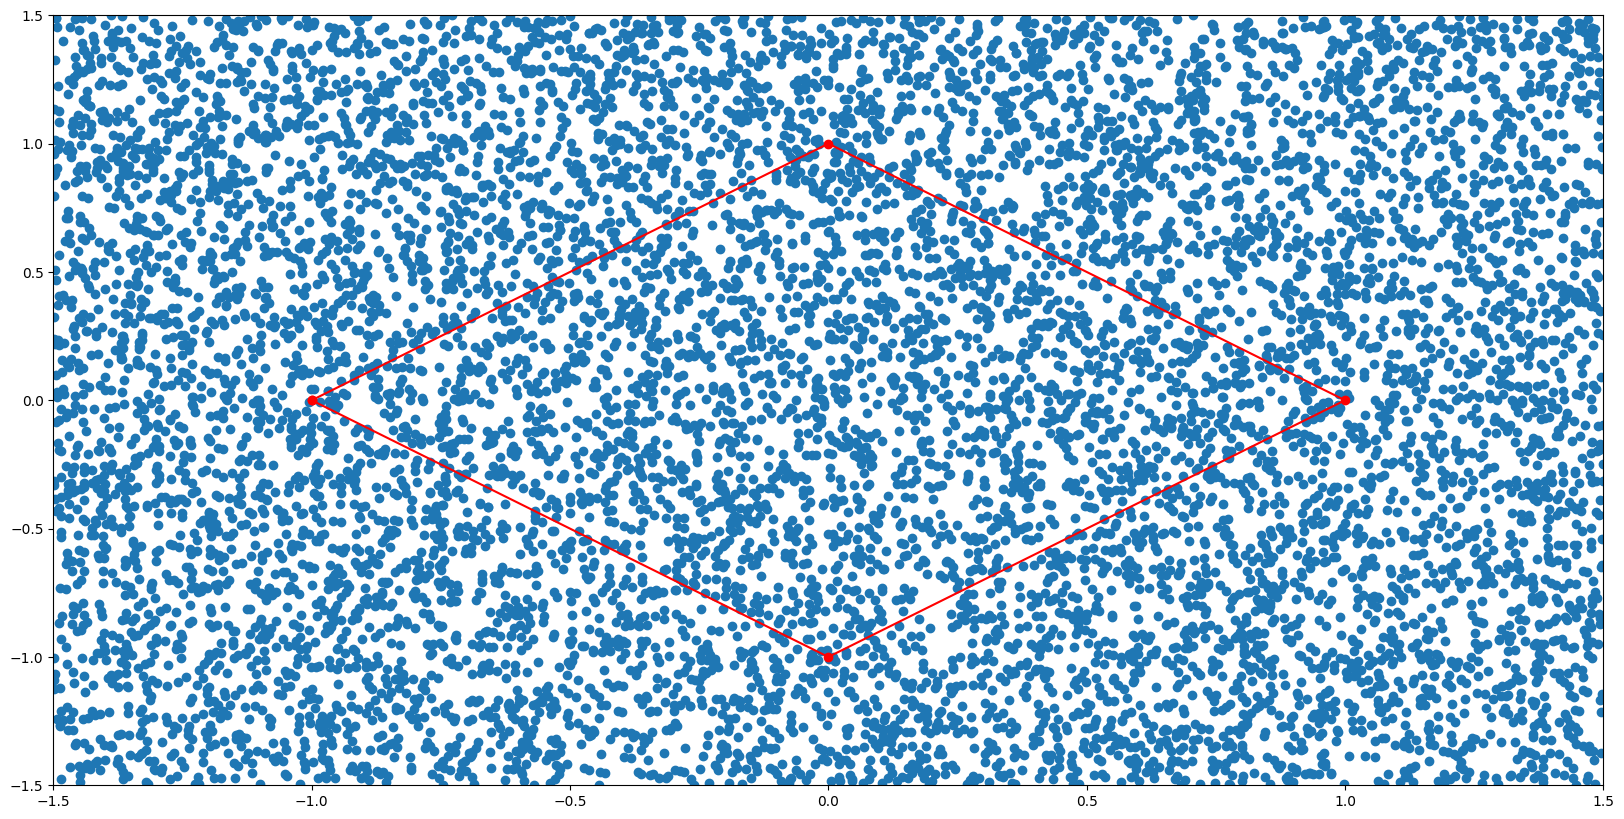

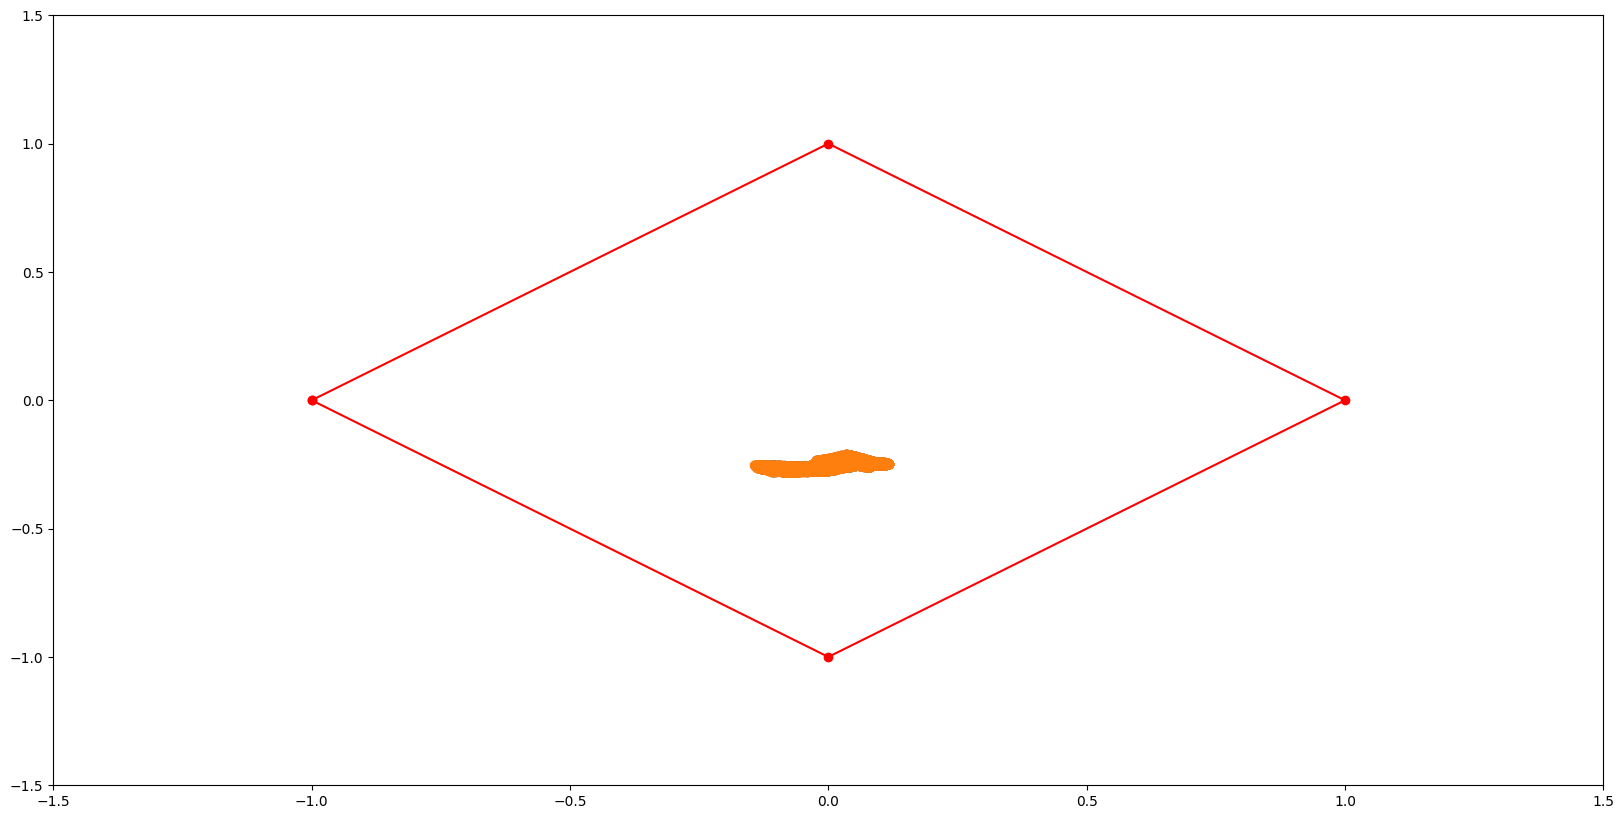

In [15]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [16]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.9217235818721423, l_pos = 0.8068676812046857, l_neg = 0.5208130854967095, l_gen = 0.5940428151707471
batch = 100, mean loss = 1.885283625335553, l_pos = 0.7830666762834092, l_neg = 0.487843225020427, l_gen = 0.6143737240317165
batch = 200, mean loss = 1.8152162344226102, l_pos = 0.7492730758497941, l_neg = 0.36073736552409785, l_gen = 0.7052057930487183
batch = 228, mean loss = 1.798758504117195, l_pos = 0.7400736429559984, l_neg = 0.3286055740257272, l_gen = 0.7300792871354682
=== Epoch: 1===
batch = 0, mean loss = 1.673298950960272, l_pos = 0.6716392072248648, l_neg = 0.05540773687079401, l_gen = 0.9462520068646132
batch = 100, mean loss = 1.6406279337732201, l_pos = 0.6386026034959004, l_neg = 0.05572869881438279, l_gen = 0.9462966314629384
batch = 200, mean loss = 1.6135086726549046, l_pos = 0.6121642690863244, l_neg = 0.04283583867024451, l_gen = 0.958508564898336
batch = 228, mean loss = 1.6062698159854036, l_pos = 0.6050378552628136, l_ne

In [17]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.1721648012522417, l_pos = 0.17215848853297694, l_neg = 0.002391072133170269, l_gen = 0.9976152405860944
batch = 100, mean loss = 1.162724323779716, l_pos = 0.16272349298375555, l_neg = 0.0005829307522817299, l_gen = 0.9994179000436789
batch = 200, mean loss = 1.1556506887921456, l_pos = 0.15565016233319737, l_neg = 0.0004745058798728346, l_gen = 0.9995260205790746
batch = 228, mean loss = 1.1538156487613924, l_pos = 0.15381517554507496, l_neg = 0.00044231183626493916, l_gen = 0.9995581613800524
=== Epoch: 1===
batch = 0, mean loss = 1.1391333542043218, l_pos = 0.1391333022008528, l_neg = 0.00025461240505487737, l_gen = 0.9997454395984141
batch = 100, mean loss = 1.133070418570284, l_pos = 0.1330703636350657, l_neg = 0.0001771902916312845, l_gen = 0.9998228646435875
batch = 200, mean loss = 1.1277582102307198, l_pos = 0.12775816045192923, l_neg = 0.00016700574667873023, l_gen = 0.999833044032111
batch = 228, mean loss = 1.126351675077721, l_pos =

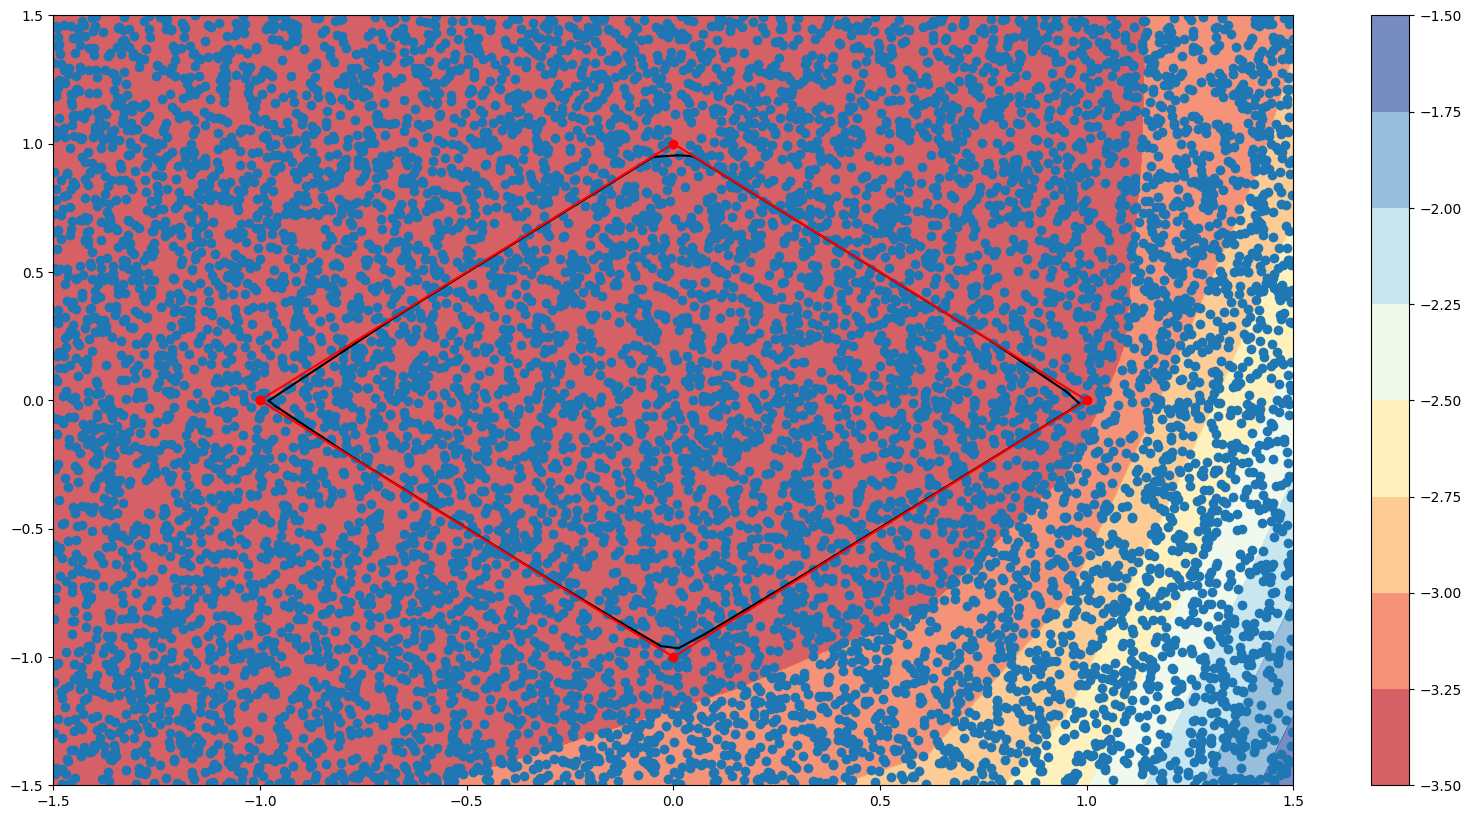

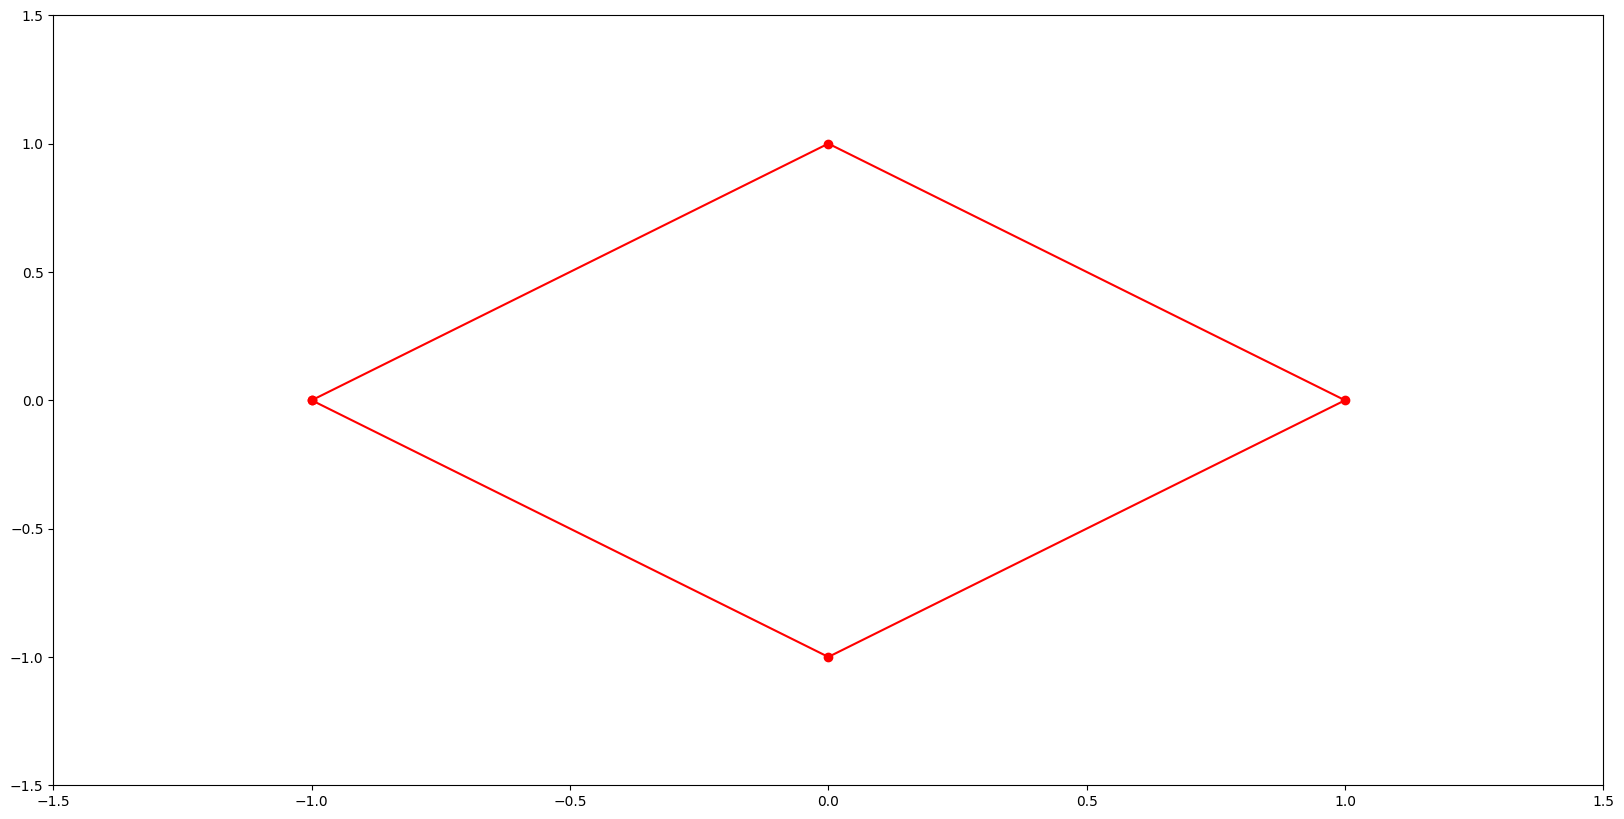

In [18]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [19]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A=A, b=b, sequential=False)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 363 nonzeros
Model fingerprint: 0x709cccab
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [3e-05, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+03]
  RHS range        [8e-03, 1e+03]
Presolve removed 69 rows and 46 columns
Presolve time: 0.00s
Presolved: 69 rows, 50 columns, 273 nonzeros
Variable types: 33 continuous, 17 integer (17 binary)
Found heuristic solution: objective -3.3218529

Root relaxation: objective -2.780674e+00, 42 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   -2.78067    0

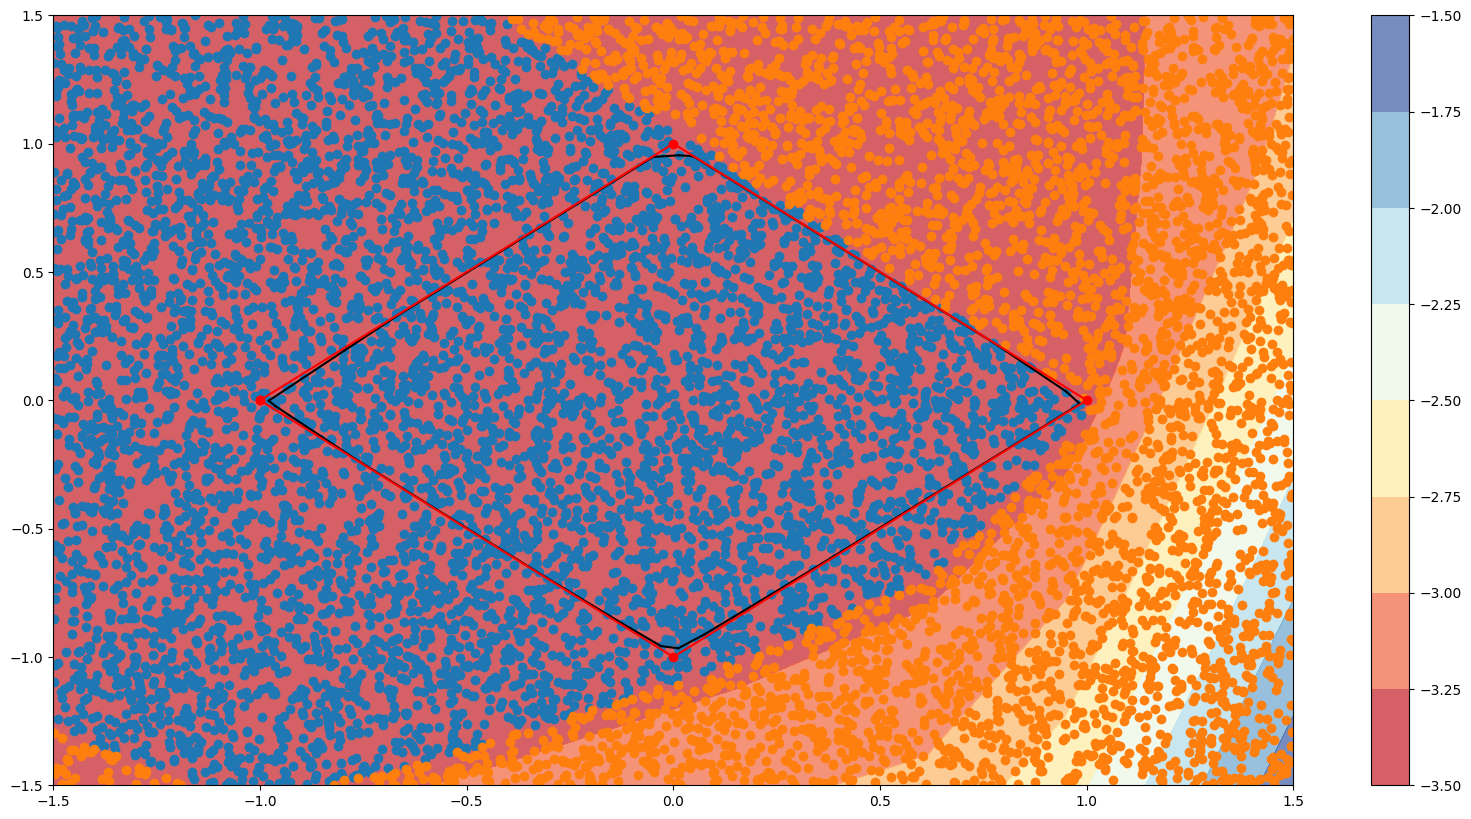

In [20]:
input_data, plots.c = result
plots.plt_mesh()